In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install -U -q PyDrive
!rm -r -f pdd_new
!git clone https://github.com/Kaliostrogoblin/PDD.git

     |████████████████████████████████| 993kB 2.7MB/s 
Cloning into 'PDD'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 270 (delta 12), reused 24 (delta 11), pack-reused 231
Receiving objects: 100% (270/270), 54.56 MiB | 11.68 MiB/s, done.
Resolving deltas: 100% (140/140), done.


In [0]:
import os
os.chdir('PDD')
#os.chdir('pdd_new')

# verify if we are in correct directory
os.listdir()

['pdd', '.gitignore', 'examples', 'server', '.git', 'README.md']

In [0]:
from pdd.utils.data_utils import create_dataset_from_dir
from pdd.datasets.allcrops import load_data

train_data_path, test_data_path = load_data(split_on_train_test=True, random_state=13)

print("Loading datasets...")
train_dataset = create_dataset_from_dir(train_data_path, shuffle=True)
test_dataset = create_dataset_from_dir(test_data_path, shuffle=True)

100%|███████████████████| 15/15 [00:00<00:00, 116.43it/s]

Splitting on train and test...
Loading datasets...


In [0]:
from pdd.utils.metrics_vis import plot_incorrect_predictions
from pdd.utils.metrics_vis import plot_confusion_matrix
from pdd.utils.metrics_vis import plot_embeddings
from keras import Model
from keras.models import load_model

Using TensorFlow backend.


In [0]:
model="/content/gdrive/My Drive/pdd_classifier_all_150epochs_100epochs.h5"


In [0]:
preds = load_model(model).predict(test_dataset['data'])
preds.argmax(axis=1)

W0724 12:05:06.546509 140037242029952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0724 12:05:06.600965 140037242029952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0724 12:05:06.650204 140037242029952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0724 12:05:06.651538 140037242029952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0724 12:05:06.654194 140037242

array([ 1, 11,  0, 11, 14,  0, 11,  9,  6,  1,  5,  9,  8,  8,  1, 14,  6,
        6,  1,  3,  3, 11, 13,  1,  7,  6,  4,  6,  6, 12,  8,  7,  6, 11,
        8,  9,  0,  4,  5, 13,  8,  7,  2,  0, 14,  2,  2, 13,  8, 12, 13,
        5, 13, 14,  3,  1, 11,  4,  7, 12, 10,  7, 10,  3,  2,  5, 10, 10,
        1,  4])

In [0]:
print(preds)

[[1.56174312e-04 9.99703467e-01 1.43124765e-07 ... 1.03292908e-09
  2.33712827e-09 2.87222290e-09]
 [4.08071683e-05 5.21393849e-05 1.73200155e-04 ... 1.64278724e-08
  3.14607469e-08 3.75948837e-08]
 [9.99455869e-01 1.48989770e-04 5.67709285e-05 ... 3.25015215e-09
  5.16263698e-09 1.25614728e-08]
 ...
 [4.51427468e-07 9.39360234e-07 1.06437419e-07 ... 1.68022147e-08
  2.35737492e-08 2.52717491e-08]
 [1.61386895e-04 9.99647856e-01 1.45022367e-08 ... 8.06167522e-10
  9.93281901e-10 9.53775392e-10]
 [1.94139627e-03 7.20557773e-06 3.26452141e-06 ... 1.60226818e-08
  1.21325625e-08 1.13716965e-07]]


In [0]:
preds.argmax(axis=1)==test_dataset['target']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

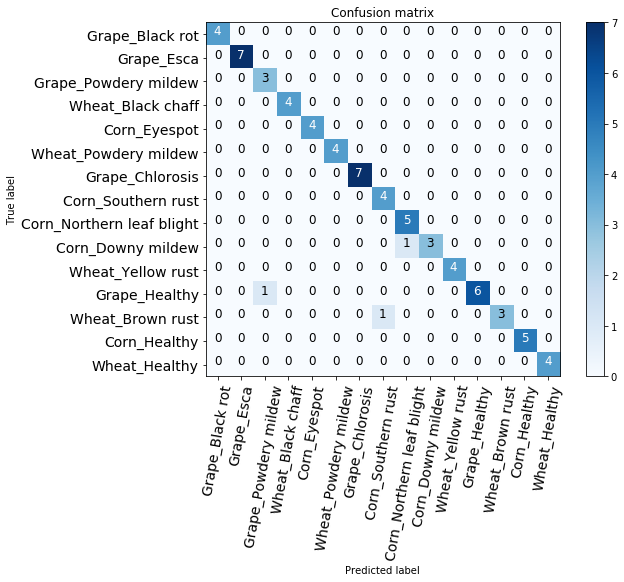

In [0]:
plot_confusion_matrix(y_true=test_dataset['target'], 
                      y_pred=preds.argmax(axis=1),
                      target_names=test_dataset['target_names'],savefig=True)

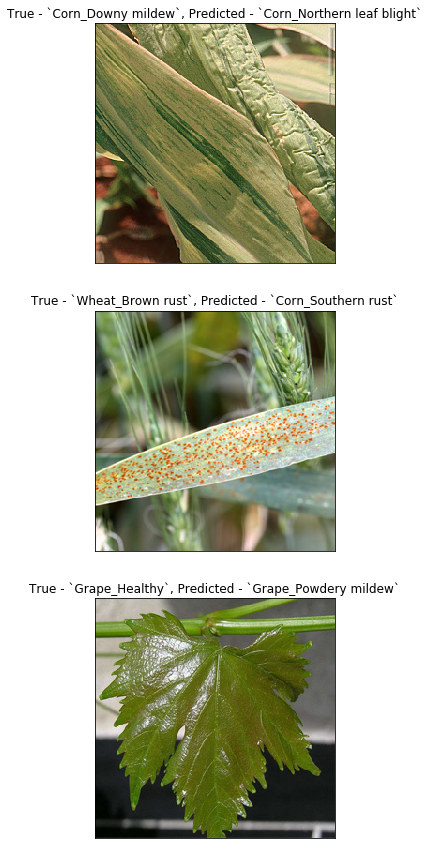

In [0]:
from pdd.utils.metrics_vis import plot_incorrect_predictions
plot_incorrect_predictions(imgs=test_dataset['data'], 
                           y_true=test_dataset['target'],
                           y_pred=preds.argmax(axis=1),
                           target_names=test_dataset['target_names'],
                           savefig=True)

In [0]:
!cp 'confusion_matrix.png' "/content/gdrive/My Drive/pdd_model_new/tfmodels/h5_confusion_matrix.png"
!cp 'incorrect_preds.png' "/content/gdrive/My Drive/pdd_model_new/tfmodels/h5_incorrect_preds.png"